In [1]:
# ======================
# Part 2: Data Cleaning
# ======================

import pandas as pd
import numpy as np

In [2]:
DATA_PATH = "../data/metadata.csv"
usecols = ['cord_uid','title','abstract','publish_time','authors','journal','source_x','doi']
existing = [c for c in usecols if c in pd.read_csv(DATA_PATH, nrows=0).columns]

In [ ]:
df = pd.read_csv(DATA_PATH, usecols=existing, dtype=str, low_memory=False)

In [4]:
 #Normalize column names
if 'source_x' in df.columns:
    df = df.rename(columns={'source_x': 'source'})

In [5]:
# Convert publish_time
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce', infer_datetime_format=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_18392\1420214259.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce', infer_datetime_format=True)


In [6]:
print("Original shape:", df.shape)

Original shape: (29500, 7)


In [7]:
# --- 1. Drop rows with no title AND no abstract ---
mask_drop = df['title'].isnull() & df['abstract'].isnull()
print("Dropping rows missing both title & abstract:", mask_drop.sum())
df = df.loc[~mask_drop]

Dropping rows missing both title & abstract: 9


In [8]:
# --- 2. Handle publish_time ---
# Keep a 'year' column for analysis
df['year'] = df['publish_time'].dt.year

In [9]:
valid_years = df['year'].notnull().sum()
print("Rows with valid year:", valid_years)

Rows with valid year: 1188


In [10]:
# --- 3. Standardize journal names ---
if 'journal' in df.columns:
    df['journal'] = df['journal'].fillna('').astype(str).str.strip()
    df['journal'] = df['journal'].replace('', np.nan)  # make empty strings into NaN

In [11]:
# --- 4. Feature engineering ---
# Title & abstract word counts
df['title_word_count'] = df['title'].fillna('').astype(str).str.split().str.len()
df['abstract_word_count'] = df['abstract'].fillna('').astype(str).str.split().str.len()

In [13]:
# --- 5. Save cleaned dataset ---
OUT_PATH = "../data/cord19_cleaned.csv"
df.to_csv(OUT_PATH, index=False)
print("Cleaned dataset saved to:", OUT_PATH)

Cleaned dataset saved to: ../data/cord19_cleaned.csv


In [14]:
# --- Quick checks ---
print("\nCleaned shape:", df.shape)
print("Remaining missing values (top):")
print(df.isnull().sum().sort_values(ascending=False).head(10))



Cleaned shape: (29491, 10)
Remaining missing values (top):
year                   28303
publish_time           28303
journal                11702
doi                     3134
abstract                2582
authors                  588
title                      0
source                     0
title_word_count           0
abstract_word_count        0
dtype: int64


In [15]:
print("\nSample of cleaned data:")
display(df.head(5))


Sample of cleaned data:


,source,title,doi,abstract,publish_time,authors,journal,year,title_word_count,abstract_word_count
0,CZI,Angiotensin-converting enzyme 2 (ACE2) as a SA...,10.1007/s00134-020-05985-9,NaN,2020-01-01,"Zhang, Haibo; Penninger, Josef M.; Li, Yimin; ...",Intensive Care Med,2020.0,14,0
1,CZI,Comparative genetic analysis of the novel coro...,10.1038/s41421-020-0147-1,NaN,2020-01-01,"Cao, Yanan; Li, Lin; Feng, Zhimin; Wan, Shengq...",Cell Discovery,2020.0,13,0
2,CZI,Incubation Period and Other Epidemiological Ch...,10.3390/jcm9020538,The geographic spread of 2019 novel coronaviru...,2020-01-01,"Linton, M. Natalie; Kobayashi, Tetsuro; Yang, ...",Journal of Clinical Medicine,2020.0,22,166
3,CZI,Characteristics of and Public Health Responses...,10.3390/jcm9020575,"In December 2019, cases of unidentified pneumo...",2020-01-01,"Deng, Sheng-Qun; Peng, Hong-Juan",J Clin Med,2020.0,14,211
4,CZI,Imaging changes in severe COVID-19 pneumonia,10.1007/s00134-020-05976-w,NaN,2020-01-01,"Zhang, Wei",Intensive Care Med,2020.0,6,0


In [ ]:
# ==============================
# Part 2b: Cleaning categorical fields & dates
# ==============================

In [16]:
# --- 1. Clean publish_time ---
# Convert publish_time to datetime (already tried before, but let's ensure)
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')

In [17]:
# Extract year into a new column
df['year'] = df['publish_time'].dt.year

In [18]:
# --- 2. Fill missing categorical fields ---
df['authors'] = df['authors'].fillna("Unknown")
df['journal'] = df['journal'].fillna("Unknown Journal")

In [19]:
# --- 3. Handle abstract ---
df['abstract'] = df['abstract'].fillna("")

In [20]:
# --- 4. Quick check of missing values after cleaning ---
missing_after = df.isna().sum().sort_values(ascending=False)
print("Remaining missing values:\n", missing_after.head(10))

Remaining missing values:
 year                   28303
publish_time           28303
doi                     3134
source                     0
title                      0
abstract                   0
authors                    0
journal                    0
title_word_count           0
abstract_word_count        0
dtype: int64


In [21]:
# --- 5. Final dataset shape ---
print("Final cleaned shape:", df.shape)

Final cleaned shape: (29491, 10)


In [22]:
# --- 6. Preview cleaned dataset ---
df.head(5)

,source,title,doi,abstract,publish_time,authors,journal,year,title_word_count,abstract_word_count
0,CZI,Angiotensin-converting enzyme 2 (ACE2) as a SA...,10.1007/s00134-020-05985-9,,2020-01-01,"Zhang, Haibo; Penninger, Josef M.; Li, Yimin; ...",Intensive Care Med,2020.0,14,0
1,CZI,Comparative genetic analysis of the novel coro...,10.1038/s41421-020-0147-1,,2020-01-01,"Cao, Yanan; Li, Lin; Feng, Zhimin; Wan, Shengq...",Cell Discovery,2020.0,13,0
2,CZI,Incubation Period and Other Epidemiological Ch...,10.3390/jcm9020538,The geographic spread of 2019 novel coronaviru...,2020-01-01,"Linton, M. Natalie; Kobayashi, Tetsuro; Yang, ...",Journal of Clinical Medicine,2020.0,22,166
3,CZI,Characteristics of and Public Health Responses...,10.3390/jcm9020575,"In December 2019, cases of unidentified pneumo...",2020-01-01,"Deng, Sheng-Qun; Peng, Hong-Juan",J Clin Med,2020.0,14,211
4,CZI,Imaging changes in severe COVID-19 pneumonia,10.1007/s00134-020-05976-w,,2020-01-01,"Zhang, Wei",Intensive Care Med,2020.0,6,0


# ==============================
# Part 3: Descriptive Analysis & Visualization
# ==============================

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
#from wordcloud import WordCloud

In [24]:
# Use a clean style
sns.set(style="whitegrid", palette="muted")

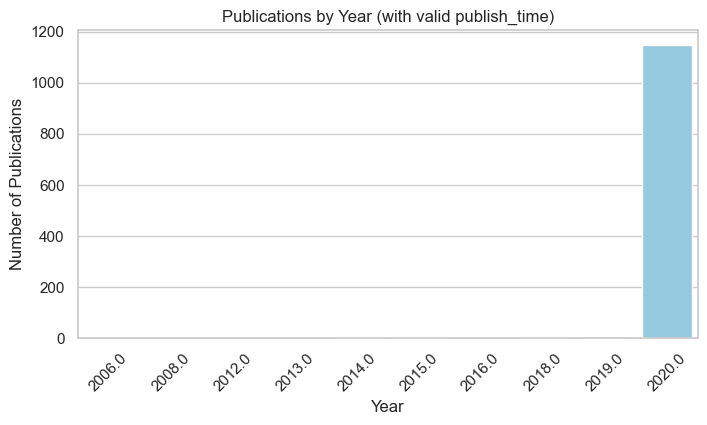

In [25]:
# --- 1. Publications by Year ---
pubs_by_year = df['year'].value_counts().sort_index()

plt.figure(figsize=(8,4))
sns.barplot(x=pubs_by_year.index, y=pubs_by_year.values, color="skyblue")
plt.title("Publications by Year (with valid publish_time)")
plt.xlabel("Year")
plt.ylabel("Number of Publications")
plt.xticks(rotation=45)
plt.show()


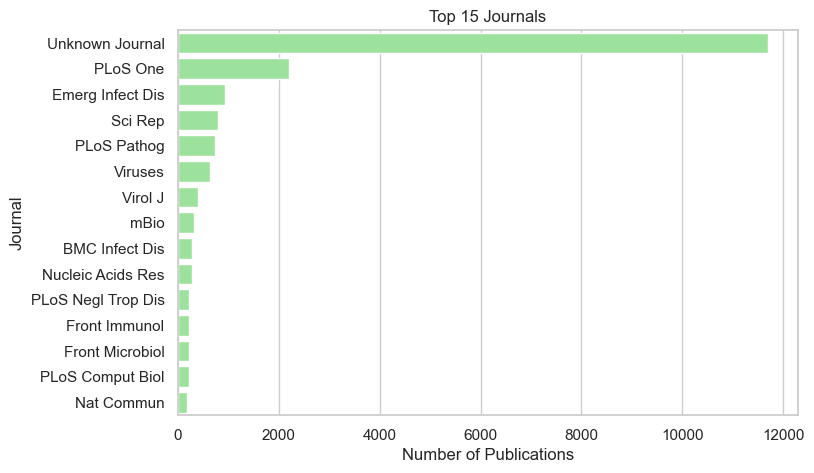

In [26]:
# --- 2. Top Journals ---
top_journals = df['journal'].value_counts().head(15)

plt.figure(figsize=(8,5))
sns.barplot(y=top_journals.index, x=top_journals.values, color="lightgreen")
plt.title("Top 15 Journals")
plt.xlabel("Number of Publications")
plt.ylabel("Journal")
plt.show()

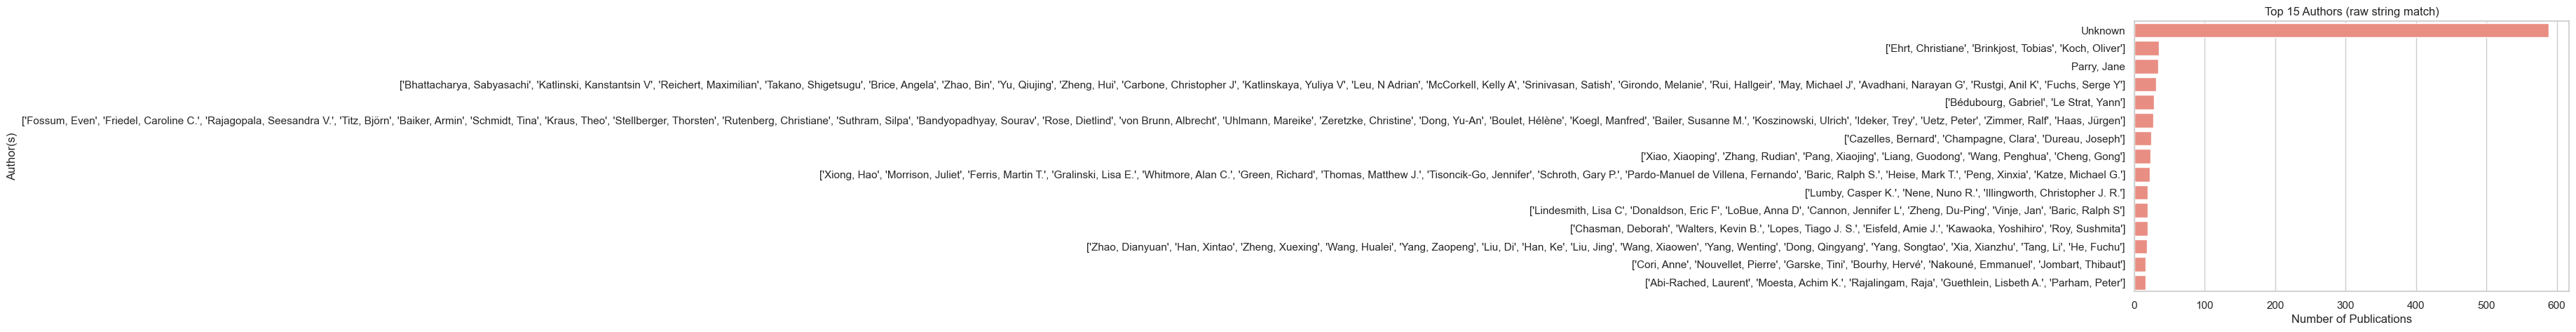

In [27]:
# --- 3. Authors with Most Publications ---
# Authors are separated by semicolons or commas in metadata, so let's just take raw counts
top_authors = df['authors'].value_counts().head(15)

plt.figure(figsize=(8,5))
sns.barplot(y=top_authors.index, x=top_authors.values, color="salmon")
plt.title("Top 15 Authors (raw string match)")
plt.xlabel("Number of Publications")
plt.ylabel("Author(s)")
plt.show()

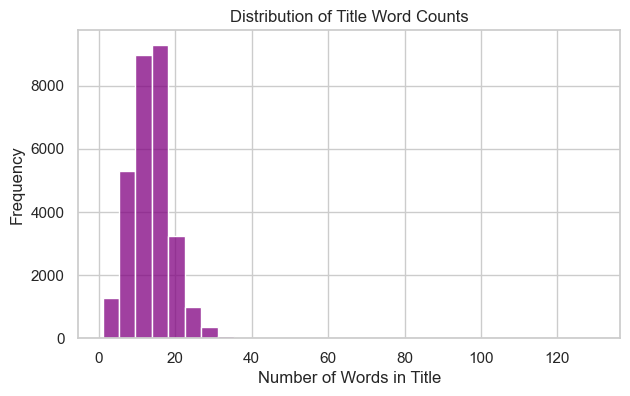

In [28]:
# --- 4. Word Count Distributions ---
plt.figure(figsize=(7,4))
sns.histplot(df['title_word_count'], bins=30, kde=False, color="purple")
plt.title("Distribution of Title Word Counts")
plt.xlabel("Number of Words in Title")
plt.ylabel("Frequency")
plt.show()


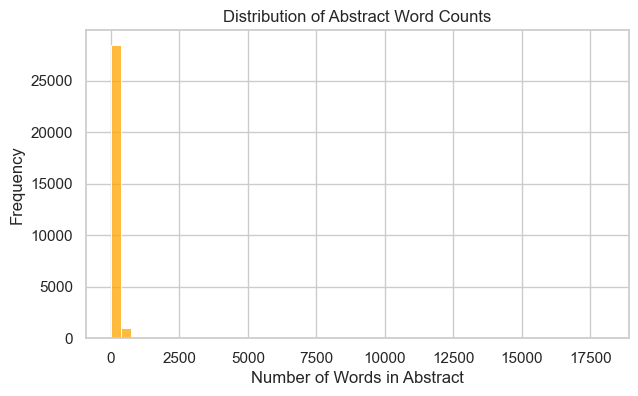

In [29]:
plt.figure(figsize=(7,4))
sns.histplot(df['abstract_word_count'], bins=50, kde=False, color="orange")
plt.title("Distribution of Abstract Word Counts")
plt.xlabel("Number of Words in Abstract")
plt.ylabel("Frequency")
plt.show()